In [1]:
import pandas as pd

In [2]:
xf = pd.ExcelFile('coronacases.xlsx')
df = xf.parse('Sheet1', skiprows = 2, index_col = 0, names = ['dates', 'cases', 'active', 'deaths'])

In [3]:
df.head()

,cases,active,deaths
dates,,,
2020-02-17,16,9,0
2020-02-18,16,7,0
2020-02-19,16,7,0
2020-02-20,16,3,0
2020-02-21,16,2,0


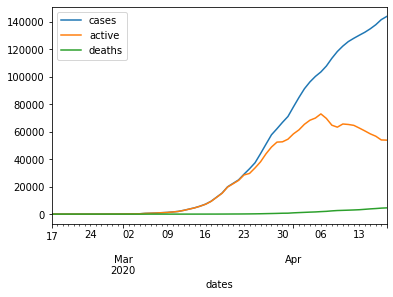

In [4]:
df[['cases', 'active', 'deaths']].plot()

In [5]:
discharged = df['cases'] -df.active
if 'healed' in df.columns:
    df.drop('healed', axis = 1, inplace =  True)
if 'healed' not in df.columns:
    df.insert(loc = len(df.columns), column = 'healed', value = discharged - df['deaths'])
df.head()

,cases,active,deaths,healed
dates,,,,
2020-02-17,16,9,0,7
2020-02-18,16,7,0,9
2020-02-19,16,7,0,9
2020-02-20,16,3,0,13
2020-02-21,16,2,0,14


In [6]:
healed_ratio = df['healed'] * 100 / discharged
healed_ratio

dates
2020-02-17    100.000000
2020-02-18    100.000000
2020-02-19    100.000000
2020-02-20    100.000000
2020-02-21    100.000000
                 ...    
2020-04-14     95.125183
2020-04-15     95.021203
2020-04-16     95.000740
2020-04-17     95.024352
2020-04-18     94.954302
Length: 62, dtype: float64

In [8]:
death_ratio = df['deaths'] * 100 /discharged
death_ratio

dates
2020-02-17    0.000000
2020-02-18    0.000000
2020-02-19    0.000000
2020-02-20    0.000000
2020-02-21    0.000000
                ...   
2020-04-14    4.874817
2020-04-15    4.978797
2020-04-16    4.999260
2020-04-17    4.975648
2020-04-18    5.045698
Length: 62, dtype: float64

In [9]:
outcome = {'death_ratio':death_ratio, 'healed_ratio':healed_ratio}
outcome_df = pd.DataFrame(outcome)
outcome_df

,death_ratio,healed_ratio
dates,,
2020-02-17,0.000000,100.000000
2020-02-18,0.000000,100.000000
2020-02-19,0.000000,100.000000
2020-02-20,0.000000,100.000000
2020-02-21,0.000000,100.000000
...,...,...
2020-04-14,4.874817,95.125183
2020-04-15,4.978797,95.021203
2020-04-16,4.999260,95.000740


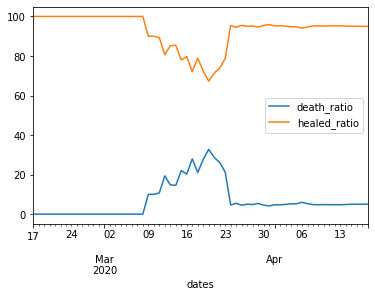

In [10]:
outcome_df.plot()

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

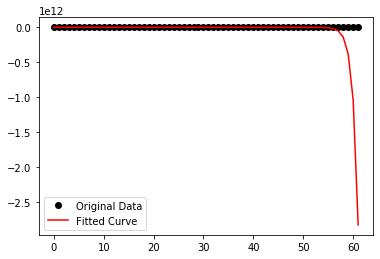

In [29]:
def growth_func(x, a, b, c):
    return a * np.exp(b * x) + c
Y = df.cases.values
X = np.arange(0, len(Y))
popt, pcov = curve_fit(growth_func, X, Y)

def growth(x):
    return growth_func(x, *popt)

plt.figure()
plt.plot(X, Y, 'ko', label = 'Original Data')
plt.plot(X, growth(X), 'r-', label = 'Fitted Curve')
plt.legend()
plt.show()

In [28]:
df.cases

dates
2020-02-17        16
2020-02-18        16
2020-02-19        16
2020-02-20        16
2020-02-21        16
               ...  
2020-04-14    132210
2020-04-15    134753
2020-04-16    137698
2020-04-17    141397
2020-04-18    143724
Name: cases, Length: 62, dtype: int64

In [1]:
!ls *.csv

wh_2015.csv  wh_2017.csv    World_Happiness_2015.csv  World_Happiness_2017.csv
wh_2016.csv  World_dev.csv  World_Happiness_2016.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
df = pd.DataFrame(np.random.randn(5,3), index = ['a','c','e','f','h'], columns=['one','two','three'])
df

,one,two,three
a,0.792882,-0.497909,-2.291803
c,0.281566,1.739615,-1.456246
e,0.556665,-1.260807,-0.069516
f,-0.290997,-0.718448,0.267938
h,-1.779128,-0.169575,-1.281293


In [6]:
df['four'] = 'bar'
df['five'] = df['one'] > 0
df

,one,two,three,four,five
a,0.792882,-0.497909,-2.291803,bar,True
c,0.281566,1.739615,-1.456246,bar,True
e,0.556665,-1.260807,-0.069516,bar,True
f,-0.290997,-0.718448,0.267938,bar,False
h,-1.779128,-0.169575,-1.281293,bar,False


In [7]:
df2 = df.reindex(['a','b','c','d','e','f','g','h'])
df2

,one,two,three,four,five
a,0.792882,-0.497909,-2.291803,bar,True
b,NaN,NaN,NaN,NaN,NaN
c,0.281566,1.739615,-1.456246,bar,True
d,NaN,NaN,NaN,NaN,NaN
e,0.556665,-1.260807,-0.069516,bar,True
f,-0.290997,-0.718448,0.267938,bar,False
g,NaN,NaN,NaN,NaN,NaN
h,-1.779128,-0.169575,-1.281293,bar,False


In [13]:
df2.one.isna()

a    False
b     True
c    False
d     True
e    False
f    False
g     True
h    False
Name: one, dtype: bool

In [11]:
pd.isna(df2.one)

a    False
b     True
c    False
d     True
e    False
f    False
g     True
h    False
Name: one, dtype: bool

In [14]:
df2['four'].notna()

a     True
b    False
c     True
d    False
e     True
f     True
g    False
h     True
Name: four, dtype: bool

In [15]:
df2.isna()

,one,two,three,four,five
a,False,False,False,False,False
b,True,True,True,True,True
c,False,False,False,False,False
d,True,True,True,True,True
e,False,False,False,False,False
f,False,False,False,False,False
g,True,True,True,True,True
h,False,False,False,False,False


In [16]:
None == None

True

In [17]:
np.nan == np.nan

False

In [18]:
df2
#NaN is a float

,one,two,three,four,five
a,0.792882,-0.497909,-2.291803,bar,True
b,NaN,NaN,NaN,NaN,NaN
c,0.281566,1.739615,-1.456246,bar,True
d,NaN,NaN,NaN,NaN,NaN
e,0.556665,-1.260807,-0.069516,bar,True
f,-0.290997,-0.718448,0.267938,bar,False
g,NaN,NaN,NaN,NaN,NaN
h,-1.779128,-0.169575,-1.281293,bar,False


In [24]:
pd.Series([1,2, np.nan,4], dtype = 'Int64').dtype

Int64Dtype()

In [25]:
s = pd.Series([1,2,3])
s.loc[0] = None
s

0    NaN
1    2.0
2    3.0
dtype: float64

In [26]:
s = pd.Series(['a','b','c'])
s.loc[0] = None
s[1] = np.nan
s

0    None
1     NaN
2       c
dtype: object

In [32]:
df2

,one,two,three,four,five
a,0.792882,-0.497909,-2.291803,bar,True
b,NaN,NaN,NaN,NaN,NaN
c,0.281566,1.739615,-1.456246,bar,True
d,NaN,NaN,NaN,NaN,NaN
e,0.556665,-1.260807,-0.069516,bar,True
f,-0.290997,-0.718448,0.267938,bar,False
g,NaN,NaN,NaN,NaN,NaN
h,-1.779128,-0.169575,-1.281293,bar,False


In [33]:
df

,one,two,three,four,five
a,0.792882,-0.497909,-2.291803,bar,True
c,0.281566,1.739615,-1.456246,bar,True
e,0.556665,-1.260807,-0.069516,bar,True
f,-0.290997,-0.718448,0.267938,bar,False
h,-1.779128,-0.169575,-1.281293,bar,False


In [37]:
df2.fillna(method='pad')

,one,two,three,four,five
a,0.792882,-0.497909,-2.291803,bar,True
b,0.792882,-0.497909,-2.291803,bar,True
c,0.281566,1.739615,-1.456246,bar,True
d,0.281566,1.739615,-1.456246,bar,True
e,0.556665,-1.260807,-0.069516,bar,True
f,-0.290997,-0.718448,0.267938,bar,False
g,-0.290997,-0.718448,0.267938,bar,False
h,-1.779128,-0.169575,-1.281293,bar,False


In [38]:
dff = pd.DataFrame(np.random.randn(10,3), columns = list('ABC'))
dff.iloc[3:5,0] = np.nan
dff.iloc[4:6, 1] = np.nan
dff.iloc[5:8, 2] = np.nan
dff

,A,B,C
0,-0.867918,-0.029855,-1.250730
1,0.372881,0.792322,-0.127022
2,-1.208817,0.231423,-0.845824
3,NaN,1.252208,-1.628606
4,NaN,NaN,0.359819
5,-0.321208,NaN,NaN
6,0.818933,-0.663379,NaN
7,0.266442,0.963739,NaN
8,-1.234790,1.626608,2.075240
9,0.233431,0.355444,-0.050100


In [39]:
dff.mean()

A   -0.242631
B    0.566064
C   -0.209603
dtype: float64

In [40]:
dff.fillna(dff.mean())

,A,B,C
0,-0.867918,-0.029855,-1.250730
1,0.372881,0.792322,-0.127022
2,-1.208817,0.231423,-0.845824
3,-0.242631,1.252208,-1.628606
4,-0.242631,0.566064,0.359819
5,-0.321208,0.566064,-0.209603
6,0.818933,-0.663379,-0.209603
7,0.266442,0.963739,-0.209603
8,-1.234790,1.626608,2.075240
9,0.233431,0.355444,-0.050100


In [41]:
dff.fillna(dff.mean()['B':'C'])

,A,B,C
0,-0.867918,-0.029855,-1.250730
1,0.372881,0.792322,-0.127022
2,-1.208817,0.231423,-0.845824
3,NaN,1.252208,-1.628606
4,NaN,0.566064,0.359819
5,-0.321208,0.566064,-0.209603
6,0.818933,-0.663379,-0.209603
7,0.266442,0.963739,-0.209603
8,-1.234790,1.626608,2.075240
9,0.233431,0.355444,-0.050100


In [43]:
dff.where(pd.notna(dff), dff.mean(), axis = 'columns')

,A,B,C
0,-0.867918,-0.029855,-1.250730
1,0.372881,0.792322,-0.127022
2,-1.208817,0.231423,-0.845824
3,-0.242631,1.252208,-1.628606
4,-0.242631,0.566064,0.359819
5,-0.321208,0.566064,-0.209603
6,0.818933,-0.663379,-0.209603
7,0.266442,0.963739,-0.209603
8,-1.234790,1.626608,2.075240
9,0.233431,0.355444,-0.050100


In [44]:
df2

,one,two,three,four,five
a,0.792882,-0.497909,-2.291803,bar,True
b,NaN,NaN,NaN,NaN,NaN
c,0.281566,1.739615,-1.456246,bar,True
d,NaN,NaN,NaN,NaN,NaN
e,0.556665,-1.260807,-0.069516,bar,True
f,-0.290997,-0.718448,0.267938,bar,False
g,NaN,NaN,NaN,NaN,NaN
h,-1.779128,-0.169575,-1.281293,bar,False


In [45]:
df2.dropna()

,one,two,three,four,five
a,0.792882,-0.497909,-2.291803,bar,True
c,0.281566,1.739615,-1.456246,bar,True
e,0.556665,-1.260807,-0.069516,bar,True
f,-0.290997,-0.718448,0.267938,bar,False
h,-1.779128,-0.169575,-1.281293,bar,False


In [46]:
df2.dropna(axis = 1)

""
a
b
c
d
e
f
g
h


In [47]:
df['one'].dropna()

a    0.792882
c    0.281566
e    0.556665
f   -0.290997
h   -1.779128
Name: one, dtype: float64

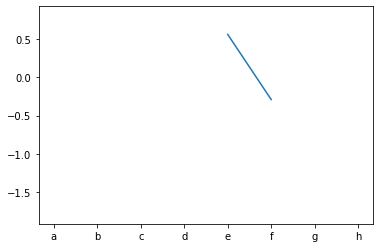

In [48]:
df2.one.plot()

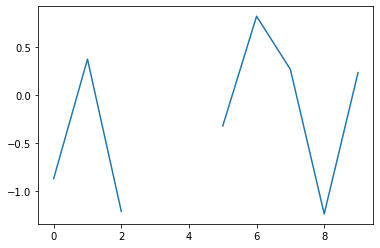

In [50]:
dff.A.plot()

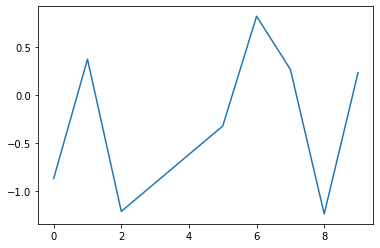

In [54]:
dff.A.interpolate().plot()

In [55]:
d = {'a': list(range(4)), 'b':list('ab..'), 'c':['a','b',np.nan,'d']}
df = pd.DataFrame(d)
df.replace('.', np.nan)

,a,b,c
0,0,a,a
1,1,b,b
2,2,NaN,NaN
3,3,NaN,d


In [56]:
df.replace(r'\s*\.\s*', np.nan, regex=True)

,a,b,c
0,0,a,a
1,1,b,b
2,2,NaN,NaN
3,3,NaN,d


In [57]:
df.replace(['a','.'], ['b',np.nan])

,a,b,c
0,0,b,b
1,1,b,b
2,2,NaN,NaN
3,3,NaN,d


In [58]:
df

,a,b,c
0,0,a,a
1,1,b,b
2,2,.,NaN
3,3,.,d


In [59]:
df.replace(np.nan, 'd')

,a,b,c
0,0,a,a
1,1,b,b
2,2,.,d
3,3,.,d


In [60]:
df.b.replace('a',np.nan)

0    NaN
1      b
2      .
3      .
Name: b, dtype: object